In [ ]:
# imports
import pandas as pd
import numpy as np
from lightgbm import LGBMClassifier,LGBMRegressor
from sklearn.preprocessing import StandardScaler,LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score,r2_score
import warnings
warnings.filterwarnings('ignore')

In [4]:
sonar_df = pd.read_csv(r'..\Cases\Sonar\Sonar.csv')
sonar_df.head()


,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,V29,V30,V31,V32,V33,V34,V35,V36,V37,V38,V39,V40,V41,V42,V43,V44,V45,V46,V47,V48,V49,V50,V51,V52,V53,V54,V55,V56,V57,V58,V59,V60,Class
0,0.0200,0.0371,0.0428,0.0207,0.0954,0.0986,0.1539,0.1601,0.3109,0.2111,0.1609,0.1582,0.2238,0.0645,0.0660,0.2273,0.3100,0.2999,0.5078,0.4797,0.5783,0.5071,0.4328,0.5550,0.6711,0.6415,0.7104,0.8080,0.6791,0.3857,0.1307,0.2604,0.5121,0.7547,0.8537,0.8507,0.6692,0.6097,0.4943,0.2744,0.0510,0.2834,0.2825,0.4256,0.2641,0.1386,0.1051,0.1343,0.0383,0.0324,0.0232,0.0027,0.0065,0.0159,0.0072,0.0167,0.0180,0.0084,0.0090,0.0032,R
1,0.0453,0.0523,0.0843,0.0689,0.1183,0.2583,0.2156,0.3481,0.3337,0.2872,0.4918,0.6552,0.6919,0.7797,0.7464,0.9444,1.0000,0.8874,0.8024,0.7818,0.5212,0.4052,0.3957,0.3914,0.3250,0.3200,0.3271,0.2767,0.4423,0.2028,0.3788,0.2947,0.1984,0.2341,0.1306,0.4182,0.3835,0.1057,0.1840,0.1970,0.1674,0.0583,0.1401,0.1628,0.0621,0.0203,0.0530,0.0742,0.0409,0.0061,0.0125,0.0084,0.0089,0.0048,0.0094,0.0191,0.0140,0.0049,0.0052,0.0044,R
2,0.0262,0.0582,0.1099,0.1083,0.0974,0.2280,0.2431,0.3771,0.5598,0.6194,0.6333,0.7060,0.5544,0.5320,0.6479,0.6931,0.6759,0.7551,0.8929,0.8619,0.7974,0.6737,0.4293,0.3648,0.5331,0.2413,0.5070,0.8533,0.6036,0.8514,0.8512,0.5045,0.1862,0.2709,0.4232,0.3043,0.6116,0.6756,0.5375,0.4719,0.4647,0.2587,0.2129,0.2222,0.2111,0.0176,0.1348,0.0744,0.0130,0.0106,0.0033,0.0232,0.0166,0.0095,0.0180,0.0244,0.0316,0.0164,0.0095,0.0078,R
3,0.0100,0.0171,0.0623,0.0205,0.0205,0.0368,0.1098,0.1276,0.0598,0.1264,0.0881,0.1992,0.0184,0.2261,0.1729,0.2131,0.0693,0.2281,0.4060,0.3973,0.2741,0.3690,0.5556,0.4846,0.3140,0.5334,0.5256,0.2520,0.2090,0.3559,0.6260,0.7340,0.6120,0.3497,0.3953,0.3012,0.5408,0.8814,0.9857,0.9167,0.6121,0.5006,0.3210,0.3202,0.4295,0.3654,0.2655,0.1576,0.0681,0.0294,0.0241,0.0121,0.0036,0.0150,0.0085,0.0073,0.0050,0.0044,0.0040,0.0117,R
4,0.0762,0.0666,0.0481,0.0394,0.0590,0.0649,0.1209,0.2467,0.3564,0.4459,0.4152,0.3952,0.4256,0.4135,0.4528,0.5326,0.7306,0.6193,0.2032,0.4636,0.4148,0.4292,0.5730,0.5399,0.3161,0.2285,0.6995,1.0000,0.7262,0.4724,0.5103,0.5459,0.2881,0.0981,0.1951,0.4181,0.4604,0.3217,0.2828,0.2430,0.1979,0.2444,0.1847,0.0841,0.0692,0.0528,0.0357,0.0085,0.0230,0.0046,0.0156,0.0031,0.0054,0.0105,0.0110,0.0015,0.0072,0.0048,0.0107,0.0094,R


In [5]:
X= sonar_df.drop(columns=['Class'],axis=1)
y= sonar_df['Class']
le= LabelEncoder()
y= le.fit_transform(y)
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=25,stratify=y)
# y_train

In [ ]:
n_estimate=[10,50,100,200]
lr=np.linspace(0.001,1,10)
depth=[1,2,3,4]
scores=[]
for n in n_estimate:
    for r in lr:
        for d in depth:
            lgb=LGBMClassifier(n_estimators=n,learning_rate=r,max_depth=d,random_state=25)
            lgb.fit(X_train,y_train)
            # y_pred =ada.predict(X_test)
            y_pred_proba=lgb.predict_proba(X_test)
            scores.append([n,r,d,roc_auc_score(y_test,y_pred_proba[:,1])])
scores_df=pd.DataFrame(scores,columns=['n_estimate','Learning rate','Depth','roc_auc_score'])
scores_df.sort_values(by='roc_auc_score',ascending=False,inplace=True)
scores_df.head()

,n_estimate,Learning rate,Depth,roc_auc_score
103,100,0.556,4,0.934077
143,200,0.556,4,0.934077
91,100,0.223,4,0.934077
65,50,0.667,2,0.934077
63,50,0.556,4,0.933063


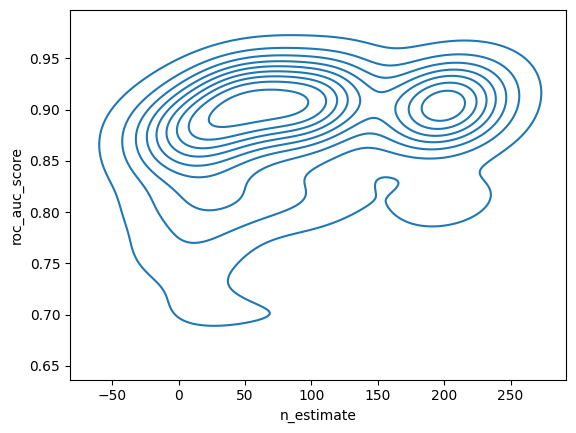

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.kdeplot(x=scores_df['n_estimate'],y=scores_df['roc_auc_score'])
plt.show()

In [8]:
concrete_df = pd.read_csv(r'..\Cases\Concrete Strength\Concrete_Data.csv')
concrete_df.head()
X= concrete_df.drop(columns=['Strength'])
y= concrete_df['Strength']
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=25)
scaler=StandardScaler()
X_train_scaled=scaler.fit_transform(X_train)
X_test_scaled=scaler.transform(X_test)

In [ ]:
n_estimate=[10,50,100,200]
lr=np.linspace(0.001,1,10)
depth=[1,2,3,4]
scores=[]
for n in n_estimate:
    for r in lr:
        for d in depth:
            lgb=LGBMRegressor(n_estimators=n,learning_rate=r,max_depth=d,random_state=25)
            lgb.fit(X_train,y_train)
            # y_pred =ada.predict(X_test)
            y_pred=lgb.predict(X_test)
            scores.append([n,r,d,r2_score(y_test,y_pred)])
scores_df=pd.DataFrame(scores,columns=['n_estimate','Learning rate','Depth','r2_score'])
scores_df.sort_values(by='r2_score',ascending=False,inplace=True)
scores_df.head()

,n_estimate,Learning rate,Depth,r2_score
135,200,0.334,4,0.922802
139,200,0.445,4,0.921528
99,100,0.445,4,0.920487
95,100,0.334,4,0.918170
131,200,0.223,4,0.917955
